# Introduction to Artificial Intelligence Project - COVID-19 Infection Analysis and Prediction

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sc

from math import sqrt, log, exp

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from datetime import datetime

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist
from scipy import stats

# I - Analysis of the dataset

In [84]:
df = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/Artificial Intelligence/Project/latestdata.csv", sep=",", 
                dtype={"age":str,"sex":str,"country":str,"outcome":str,"chronic_disease_binary":int,
                       "date_onset_symptoms":str, "lives_in_Wuhan":str,"travel_history_dates":str})
df.head(10)

C:\Users\cerfi\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,12,15,16,17,19,20,21,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
5,000-1-10001,NaN,NaN,Yichun City,Jiangxi,China,28.307550,114.973200,admin2,NaN,...,NaN,NaN,NaN,NaN,Yichun City,Jiangxi,China,9794.0,NaN,NaN
6,000-1-10002,NaN,NaN,Shangrao City,Jiangxi,China,28.776930,117.469200,admin2,NaN,...,NaN,NaN,NaN,NaN,Shangrao City,Jiangxi,China,7982.0,NaN,NaN
7,000-1-10003,NaN,NaN,Fuzhou City,Jiangxi,China,27.511280,116.434400,admin2,NaN,...,NaN,NaN,NaN,NaN,Fuzhou City,Jiangxi,China,3449.0,NaN,NaN
8,000-1-10004,NaN,NaN,Nanchang City,Jiangxi,China,28.661490,116.025700,admin2,NaN,...,NaN,NaN,NaN,NaN,Nanchang City,Jiangxi,China,6422.0,NaN,NaN
9,000-1-10005,NaN,NaN,Nanchang City,Jiangxi,China,28.661490,116.025700,admin2,NaN,...,NaN,NaN,NaN,NaN,Nanchang City,Jiangxi,China,6422.0,NaN,NaN


In [85]:
df.shape

(2676311, 33)

Type of data

In [87]:
df.dtypes

ID                           object
age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary        int32
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                      

Missing values

In [88]:
print("Checking missing values")
df.isnull().sum()

Checking missing values


ID                                0
age                         2098293
sex                         2096154
city                         977681
province                     452664
country                         115
latitude                         61
longitude                        61
geo_resolution                   61
date_onset_symptoms         2414712
date_admission_hospital     2560100
date_confirmation            108489
symptoms                    2674259
lives_in_Wuhan              2671973
travel_history_dates        2673700
travel_history_location     2667089
reported_market_exposure    2675242
additional_information      2630456
chronic_disease_binary            0
chronic_disease             2676096
source                       566964
sequence_available          2676299
outcome                     2368929
date_death_or_discharge     2673163
notes_for_discussion        2675671
location                    2662935
admin3                      2595877
admin2                      

Cleaning the dataset - Handling missing values

In [89]:
df_clean = df.copy()

In [91]:
df_clean['age'] = pd.to_numeric(df_clean['age'],errors='coerce')
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

In [92]:
s = df_clean['sex'].value_counts(normalize=True)
missing = df_clean['sex'].isnull()
df_clean.loc[missing,'sex'] = np.random.choice(s.index, size=len(df_clean[missing]),p=s.values)

In [93]:
country = df_clean['country'].value_counts(normalize=True)
missing = df_clean['country'].isnull()
df_clean.loc[missing,'country'] = np.random.choice(country.index, size=len(df_clean[missing]),p=country.values)

In [94]:
lives_in_Wuhan = df_clean['lives_in_Wuhan'].value_counts(normalize=True)
missing = df_clean['lives_in_Wuhan'].isnull()
df_clean.loc[missing,'lives_in_Wuhan'] = np.random.choice(lives_in_Wuhan.index, size=len(df_clean[missing]),p=lives_in_Wuhan.values)

In [95]:
chronic_disease_binary = df_clean['chronic_disease_binary'].value_counts(normalize=True)
missing = df_clean['chronic_disease_binary'].isnull()
df_clean.loc[missing,'chronic_disease_binary'] = np.random.choice(chronic_disease_binary.index, size=len(df_clean[missing]),p=chronic_disease_binary.values)

In [96]:
outcome = df_clean['outcome'].value_counts(normalize=True)
missing = df_clean['outcome'].isnull()
df_clean.loc[missing,'outcome'] = np.random.choice(outcome.index, size=len(df_clean[missing]),p=outcome.values)

In [97]:
labels_to_drop = ["ID","latitude","longitude","geo_resolution","symptoms","date_admission_hospital","date_confirmation","data_moderator_initials","admin1","admin2",
                 "admin3","location","notes_for_discussion","date_death_or_discharge","sequence_available","source","chronic_disease","additional_information","reported_market_exposure","travel_history_location",
                 "admin_id", "travel_history_binary", "country_new", "province","city"]
df_clean = df_clean.drop(labels_to_drop, axis=1)
df_clean

,age,sex,country,date_onset_symptoms,lives_in_Wuhan,travel_history_dates,chronic_disease_binary,outcome
0,40.0,male,China,NaN,no,22.01.2020,0,"critical condition, intubated as of 14.02.2020"
1,78.0,male,Italy,NaN,no,NaN,0,death
2,61.0,female,Singapore,NaN,no,NaN,0,discharge
3,40.0,female,China,NaN,no,NaN,0,Hospitalized
4,40.0,female,China,NaN,no,NaN,0,Hospitalized
...,...,...,...,...,...,...,...,...
2676306,52.0,female,Peru,NaN,no,NaN,0,Recovered
2676307,52.0,female,Peru,NaN,no,NaN,0,Hospitalized
2676308,52.0,female,Peru,NaN,no,NaN,0,Hospitalized
2676309,52.0,male,Peru,NaN,no,NaN,0,Recovered


In [98]:
df_clean = df_clean.dropna()
df_clean.head(60)

,age,sex,country,date_onset_symptoms,lives_in_Wuhan,travel_history_dates,chronic_disease_binary,outcome
504,40.0,male,Japan,08.02.2020,no,30.01.2020,0,Hospitalized
756,40.0,male,Japan,07.02.2020,yes,07.02.2020,0,Hospitalized
765,40.0,male,Japan,02.02.2020,no,10.02.2020,0,Hospitalized
797,7.0,male,China,05.02.2020,yes,23.01.2020,0,Hospitalized
798,44.0,male,China,04.02.2020,no,31.01.2020,0,Hospitalized
799,69.0,female,China,28.01.2020,no,25.01.2020,0,Hospitalized
803,35.0,female,China,04.02.2020,no,31.01.2020,0,Recovered
1042,40.0,male,Japan,25.01.2020,yes,22.01.2020,0,Recovered
1044,42.0,female,Singapore,28.01.2020,no,21.01.2020,0,Recovered
1049,24.0,male,South Korea,06.02.2020,no,31.01.2020,0,Hospitalized


In [99]:
df['outcome'].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'died', 'Death', 'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Critical condition', 'Receiving Treatment',
       'severe illness', 'unstable', 'critical condition', 'Hospitalized',
       'Migrated', 'Migrated_Other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

In [100]:
death_values = ['Dead', 'Death', 'Deceased', 'Died', 'dead', 'death', 'died']

goodNews_values = ['discharge', 'Recovered', 'Alive', 'recovered', 'Discharged from hospital', 'discharged', 'Discharged',
                       'not hospitalized', 'recovering at home 03.03.2020', 'released from quarantine', ]

hospitalize_values = ['Hospitalized', 'Receiving Treatment', 'Under treatment', 'stable', 'stable condition', 'severe', 
                          'Stable','Symptoms only improved with cough. Currently hospitalized for follow-up.',
                          'treated in an intensive care unit (14.02.2020)', 'Migrated', 'Migrated_Other',
                         'critical condition, intubated as of 14.02.2020', 'Critical condition', 'severe illness', 'critical condition', 'https://www.mspbs.gov.py/covid-19.php']

df_clean = df_clean.replace(death_values,'died')

df_clean = df_clean.replace(goodNews_values,'discharged')

df_clean = df_clean.replace(hospitalize_values,'hospitalized')
df_clean['outcome'].unique()

array(['hospitalized', 'discharged', 'died'], dtype=object)

In [175]:
df_clean_num = df_clean.copy()

In [176]:
df_clean_num['sex'] = df_clean_num['sex'].replace('male',0)
df_clean_num['sex'] = df_clean_num['sex'].replace('female',1)

df_clean_num['lives_in_Wuhan'] = df_clean_num['lives_in_Wuhan'].replace('no',0)
df_clean_num['lives_in_Wuhan'] = df_clean_num['lives_in_Wuhan'].replace('yes',1)

df_clean_num['chronic_disease_binary'] = df_clean_num['chronic_disease_binary'].replace(False,0)
df_clean_num['chronic_disease_binary'] = df_clean_num['chronic_disease_binary'].replace(True,1)

df_clean_num['outcome'] = df_clean_num['outcome'].replace(['died','hospitalized'],0)
df_clean_num['outcome'] = df_clean_num['outcome'].replace('discharged',1)
df_clean_num['outcome'] = df_clean_num['outcome'].replace('hospitalized',2)

In [177]:
df_clean_num["country"] = df_clean_num["country"].astype("category").cat.codes
df_clean_num["sex"] = df_clean_num["sex"].astype("category").cat.codes
df_clean_num["age"] = df_clean_num["age"].astype("category").cat.codes
df_clean_num.dtypes

age                         int8
sex                         int8
country                     int8
date_onset_symptoms       object
lives_in_Wuhan             int64
travel_history_dates      object
chronic_disease_binary     int64
outcome                    int64
dtype: object

# A - Correlation

                             age       sex   country  lives_in_Wuhan  \
age                     1.000000  0.008256 -0.008703        0.014804   
sex                     0.008256  1.000000 -0.009837        0.030225   
country                -0.008703 -0.009837  1.000000       -0.202091   
lives_in_Wuhan          0.014804  0.030225 -0.202091        1.000000   
chronic_disease_binary  0.079854 -0.027386  0.056352       -0.021090   
outcome                 0.023432  0.000291  0.004703        0.013261   

                        chronic_disease_binary   outcome  
age                                   0.079854  0.023432  
sex                                  -0.027386  0.000291  
country                               0.056352  0.004703  
lives_in_Wuhan                       -0.021090  0.013261  
chronic_disease_binary                1.000000  0.045583  
outcome                               0.045583  1.000000  


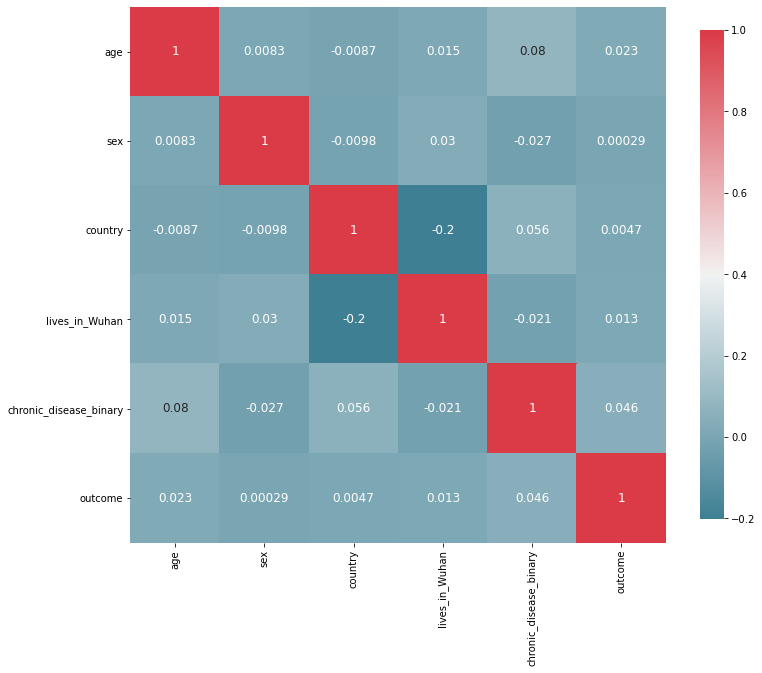

In [178]:
corr = df_clean_num.corr()
_ , ax = plt.subplots(figsize =(12, 10))
cmap = sns.diverging_palette(220,10,as_cmap = True )
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
    )
print(corr)

B  - Scatter and PCA

In [135]:
df_clean_num = df_clean_num.drop(['date_onset_symptoms', 'travel_history_dates'], axis=1)

KeyError: "['date_onset_symptoms' 'travel_history_dates'] not found in axis"

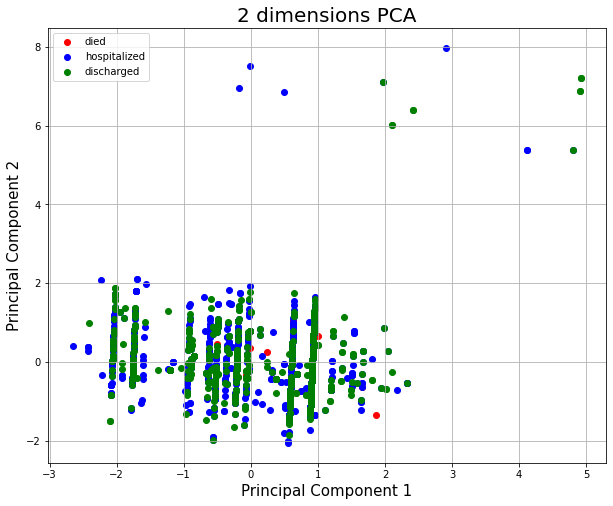

In [179]:
features = ['age', 'sex', 'country', 'lives_in_Wuhan', 'chronic_disease_binary']
X = df_clean_num.loc[:, features].values
Y = df_clean["outcome"].copy()

Y.reset_index(drop=True, inplace=True)
X = StandardScaler().fit_transform(X)

pca = sklearnPCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 dimensions PCA', fontsize = 20)
targets = ['died', 'hospitalized', 'discharged']
colors = ['red', 'blue', 'green']
for outcome, color in zip(targets,colors):
    indicesToKeep = finalDf['outcome'] == outcome
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color)
ax.legend(targets)
ax.grid()


# II - Bayes Nets

In [26]:
dataBayes = df.get(["date_onset_symptoms", "date_confirmation", "travel_history_dates", 
                    "date_admission_hospital", "outcome", "date_death_or_discharge"])

A - Probability for a person to have symptoms of COVID-19 if this person visited Wuhan 

In [27]:
travel_to_Wuhan = 0
has_symptoms = 0
travel_to_Wuhan_and_has_symptoms = 0

In [28]:
for travel in dataBayes["travel_history_dates"]:
    if type(travel) != float:
        travel_to_Wuhan += 1
        
for symptom in dataBayes["date_onset_symptoms"]:
    if type(symptom) != float:
        has_symptoms += 1
        
for travel, symptom in zip(dataBayes["travel_history_dates"], dataBayes["date_onset_symptoms"]):
    if (type(travel) != float) and (type(symptom) != float):
        travel_to_Wuhan_and_has_symptoms += 1

In [32]:
probability_Symptoms = has_symptoms / len(dataBayes["date_onset_symptoms"])
probability_travel_to_Wuhan = travel_to_Wuhan / len(dataBayes["travel_history_dates"])

probability_Wuhan_And_Symptoms = travel_to_Wuhan_and_has_symptoms / has_symptoms
probability_SymptomsInWuhan = (probability_Wuhan_And_Symptoms * probability_Symptoms) / probability_travel_to_Wuhan

print("Probability for a person to have symptoms of COVID-19 if this person visited Wuhan is %.2f " % (probability_SymptomsInWuhan*100) + "%")

Probabilty for a person to have symptoms of COVID-19 if this person visited Wuhan is 60.63 %


B - What is the probability for a person to be a true patient if this person has symptoms of COVID-19 and this person visited Wuhan?

In [34]:
confirmSymptomsWuhan = 0

for confirmed, symptom, travel in zip(dataBayes["date_confirmation"], dataBayes["date_onset_symptoms"], dataBayes["travel_history_dates"]):
    if (type(confirmed) != float) and (type(symptom) != float) and (type(travel) != float):
        confirmSymptomsWuhan += 1

probability_ConfirmSymptomsWuhan = confirmSymptomsWuhan / len(dataBayes["date_onset_symptoms"])
probability_Symptoms_And_Wuhan = travel_to_Wuhan_and_has_symptoms / len(dataBayes["date_onset_symptoms"])

Result = probability_ConfirmSymptomsWuhan / probability_Symptoms_And_Wuhan

print("Probability for a person to be a true patient if this person have symptoms of COVID-19 and this person visited Wuhan is %.2f " % (Result*100) + "%")

Probability for a person to be a true patient if this person have symptoms of COVID-19 and this person visited Wuhan is 98.42 %


C - What is the probability for a person to death if this person visited Wuhan?

In [36]:
deathLex = ['Dead', 'Death', 'Deceased', 'Died', 'dead', 'death', 'died']
dischargedVoc = ["discharge", "discharged", "Discharged from hospital", "Alive"]

died = 0
diedInWuhan = 0

for outcome, travel in zip(dataBayes["outcome"], dataBayes["date_onset_symptoms"]):
    if (type(outcome) != float):
        if (outcome in deathLex) and (type(travel) != float):
            diedInWuhan += 1

print("Probability for a person to die if this person visited Wuhan is %.2f " % ((diedInWuhan / travel_to_Wuhan)*100) + "%")

Probability for a person to die if this person visited Wuhan is 25.32 %


D - Estimate the average recovery interval for a patient if this person visited Wuhan?

In [37]:
#Initialisation of a list of day
dayList = []

for outcome, travel, date_symptoms, date_discharge in zip(dataBayes["outcome"], dataBayes["travel_history_dates"],
                                                          dataBayes["date_onset_symptoms"],
                                                          dataBayes["date_death_or_discharge"]):
    if type(outcome) != float:
        if type(travel) != float and type(date_symptoms) != float and type(
                date_discharge) != float and outcome in dischargedVoc:
            #I add the different day in the list
            dayList.append(
                datetime.strptime(date_discharge, '%d.%m.%Y') - datetime.strptime(date_symptoms, '%d.%m.%Y'))

print("Average recovery interval  for a patient if this person visited Wuhan is", np.mean(dayList).days, 'days')

Average recovery interval  for a patient if this person visited Wuhan is 18 days


# III - Machine Learning

Prepare the data

In [101]:
df_clean_num2 = df_clean.copy()

df_clean_num2['sex'] = df_clean_num2['sex'].replace('male',0)
df_clean_num2['sex'] = df_clean_num2['sex'].replace('female',1)

df_clean_num2['lives_in_Wuhan'] = df_clean_num2['lives_in_Wuhan'].replace('no',0)
df_clean_num2['lives_in_Wuhan'] = df_clean_num2['lives_in_Wuhan'].replace('yes',1)

df_clean_num2['chronic_disease_binary'] = df_clean_num2['chronic_disease_binary'].replace(False,0)
df_clean_num2['chronic_disease_binary'] = df_clean_num2['chronic_disease_binary'].replace(True,1)

df_clean_num2['outcome'] = df_clean_num2['outcome'].replace(['died','hospitalized'],0)
df_clean_num2['outcome'] = df_clean_num2['outcome'].replace('discharged',1)

df_clean_num2["country"] = df_clean_num2["country"].astype("category").cat.codes
df_clean_num2["sex"] = df_clean_num2["sex"].astype("category").cat.codes
df_clean_num2["age"] = df_clean_num2["age"].astype("category").cat.codes

df_clean_num2 = df_clean_num2.drop(['date_onset_symptoms', 'travel_history_dates'], axis=1)

features = ['age', 'sex', 'country', 'lives_in_Wuhan', 'chronic_disease_binary']
X = df_clean_num2.loc[:, features].values
Y = df_clean_num2["outcome"].copy()
Y.reset_index(drop=True, inplace=True)

# Y = pd.to_numeric(Y)
# Y=Y.astype('float')
# Y=Y.astype('int')

# Y.reset_index(drop=True, inplace=True)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=0)

A - Naive Bayes and KNN

In [185]:
def naive_bayes(X_train, X_test, y_train, y_test):
    NB_model = GaussianNB()
    NB_model.fit(X_train, y_train)
    y_nbPred = NB_model.predict(X_test)

    print(classification_report(y_test, y_nbPred))
    print(confusion_matrix(y_test, y_nbPred, normalize='true'))
    plot_confusion_matrix(NB_model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       253
           1       0.60      0.02      0.04       143

    accuracy                           0.64       396
   macro avg       0.62      0.51      0.41       396
weighted avg       0.63      0.64      0.51       396

[[0.99209486 0.00790514]
 [0.97902098 0.02097902]]


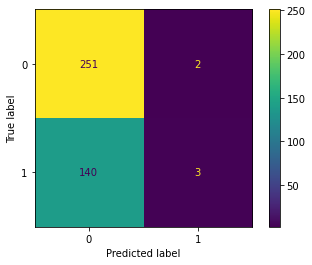

In [186]:
naive_bayes(X_train, X_test, y_train, y_test)

In [183]:
def KNN(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train,y_train)
    y_knnPred=knn_model.predict(X_test)
    print(classification_report(y_test, y_knnPred))
    print(confusion_matrix(y_test, y_knnPred, normalize='true'))
    plot_confusion_matrix(knn_model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       253
           1       0.46      0.27      0.34       143

    accuracy                           0.62       396
   macro avg       0.56      0.55      0.54       396
weighted avg       0.59      0.62      0.59       396

[[0.82608696 0.17391304]
 [0.73426573 0.26573427]]


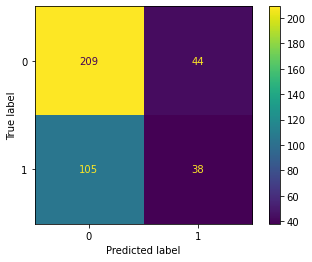

In [184]:
KNN(X_train, X_test, y_train, y_test)

B - Regression

In [109]:
df_clean_num3 = df_clean.copy()

df_clean_num3['sex'] = df_clean_num3['sex'].replace('male',0)
df_clean_num3['sex'] = df_clean_num3['sex'].replace('female',1)

df_clean_num3['lives_in_Wuhan'] = df_clean_num3['lives_in_Wuhan'].replace('no',0)
df_clean_num3['lives_in_Wuhan'] = df_clean_num3['lives_in_Wuhan'].replace('yes',1)

df_clean_num3['chronic_disease_binary'] = df_clean_num3['chronic_disease_binary'].replace(False,0)
df_clean_num3['chronic_disease_binary'] = df_clean_num3['chronic_disease_binary'].replace(True,1)

df_clean_num3['outcome'] = df_clean_num3['outcome'].replace(['died','hospitalized'],0)
df_clean_num3['outcome'] = df_clean_num3['outcome'].replace('discharged',1)

df_clean_num3["country"] = df_clean_num3["country"].astype("category").cat.codes
df_clean_num3["sex"] = df_clean_num3["sex"].astype("category").cat.codes

df_clean_num3 = df_clean_num3.drop(['date_onset_symptoms', 'travel_history_dates'], axis=1)

bins= [0,20,40,60,150]
labels = [0,1,2,3]
df_clean_num3['age'] = df_clean_num3['age']
df_clean_num3['ageGroup'] = pd.cut(df_clean_num3['age'], bins=bins, labels=labels, right=False)
df_clean_num3['ageGroup'].astype('float')
df_clean_num3 = df_clean_num3.drop('age', axis=1)

features2 = ['sex', 'country', 'lives_in_Wuhan', 'chronic_disease_binary','outcome']
X2 = df_clean_num3.loc[:, features2].values
Y2 = df_clean_num3["ageGroup"].astype("float").copy()
Y2.reset_index(drop=True, inplace=True)

X2 = StandardScaler().fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=.25, random_state=0)

In [187]:
def logisitc_regression(X_train, X_test, y_train, y_test):
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train, y_train)
    y_logRegPred=log_reg_model.predict(X_test)
    print(classification_report(y_test, y_logRegPred))
    print("MSE : ", mean_squared_error(y_test,y_logRegPred))
    plot_confusion_matrix(log_reg_model,X_test,y_test)

C:\Users\cerfi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.36      0.39      0.38       145
         2.0       0.41      0.58      0.48       166
         3.0       0.20      0.01      0.03        73

    accuracy                           0.39       396
   macro avg       0.24      0.25      0.22       396
weighted avg       0.34      0.39      0.34       396

MSE :  0.898989898989899


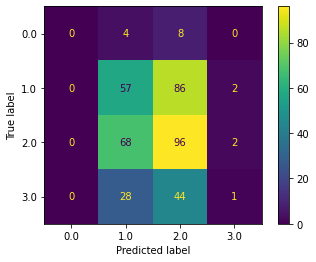

In [188]:
logisitc_regression(X_train2, X_test2, y_train2, y_test2)

C - K-Means

age                        int8
sex                        int8
country                    int8
lives_in_Wuhan            int64
chronic_disease_binary    int64
outcome                   int64
dtype: object
For n_clusters = 2 The average silhouette_score is : 0.42573633101231734
For n_clusters = 3 The average silhouette_score is : 0.41617989517390863
For n_clusters = 4 The average silhouette_score is : 0.415136807747351
For n_clusters = 5 The average silhouette_score is : 0.42879552421214434
For n_clusters = 6 The average silhouette_score is : 0.45315866065361193


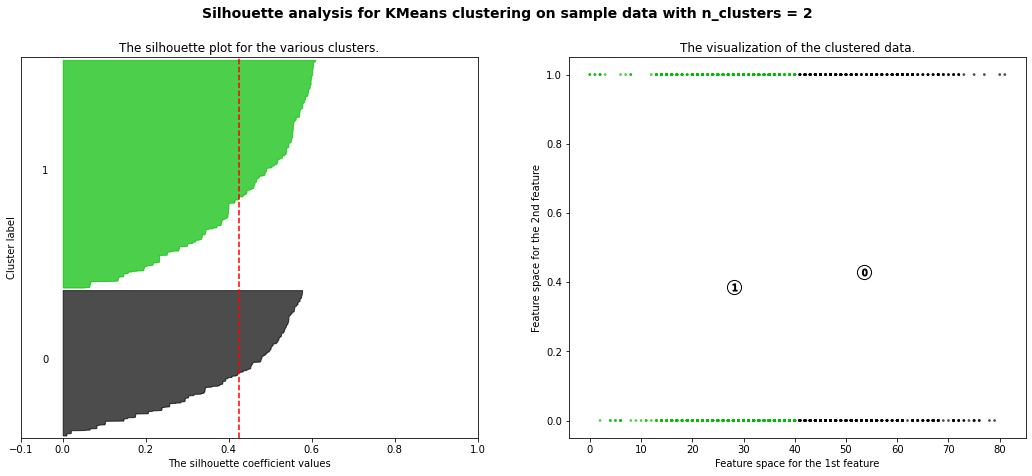

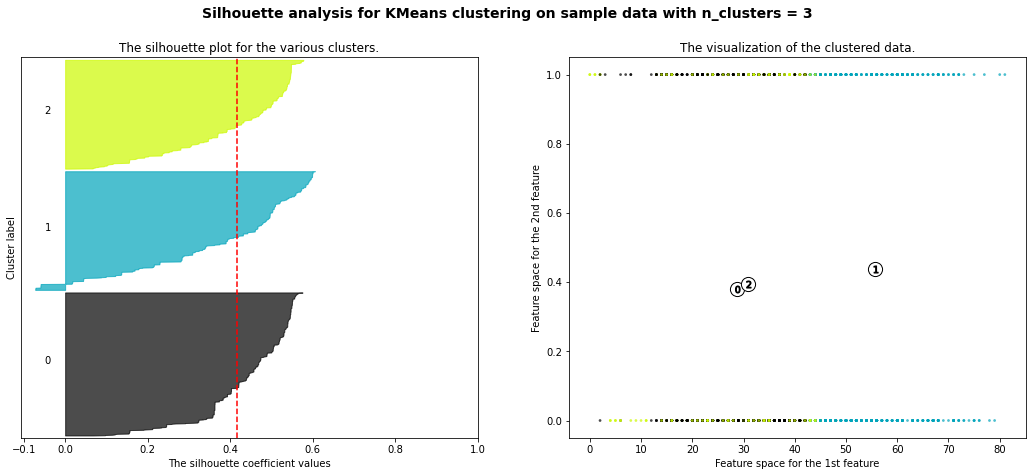

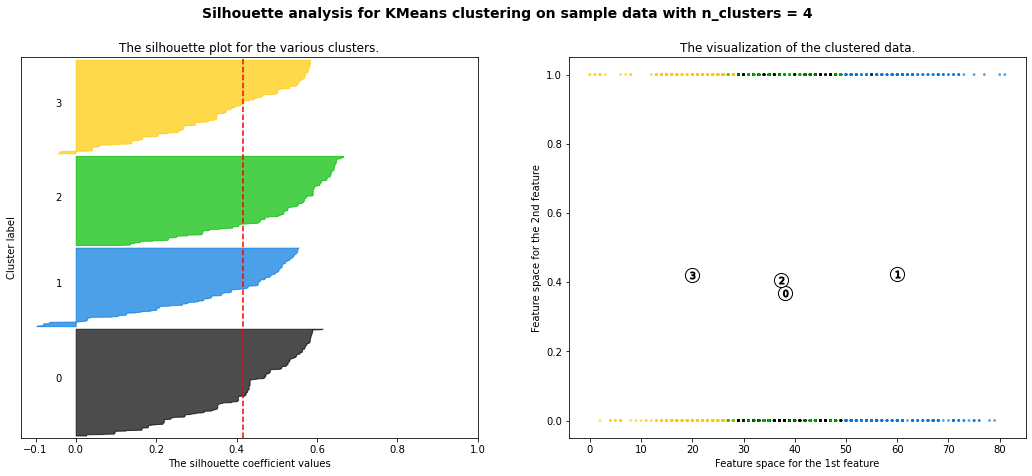

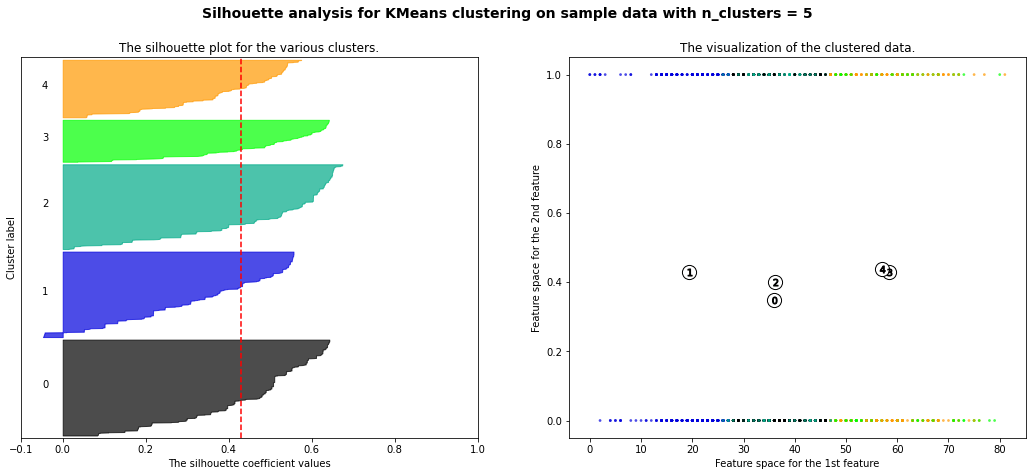

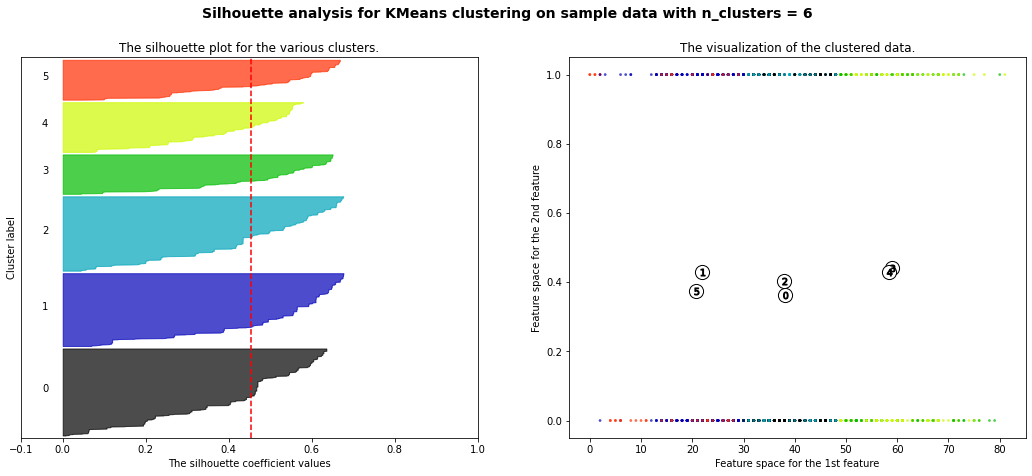

In [190]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df_clean_KMeans = df_clean.copy()

df_clean_KMeans['sex'] = df_clean_KMeans['sex'].replace('male',0)
df_clean_KMeans['sex'] = df_clean_KMeans['sex'].replace('female',1)

df_clean_KMeans['lives_in_Wuhan'] = df_clean_KMeans['lives_in_Wuhan'].replace('no',0)
df_clean_KMeans['lives_in_Wuhan'] = df_clean_KMeans['lives_in_Wuhan'].replace('yes',1)

df_clean_KMeans['chronic_disease_binary'] = df_clean_KMeans['chronic_disease_binary'].replace(False,0)
df_clean_KMeans['chronic_disease_binary'] = df_clean_KMeans['chronic_disease_binary'].replace(True,1)

df_clean_KMeans['outcome'] = df_clean_KMeans['outcome'].replace('died',0)
df_clean_KMeans['outcome'] = df_clean_KMeans['outcome'].replace('discharged',1)
df_clean_KMeans['outcome'] = df_clean_KMeans['outcome'].replace('hospitalized',2)

df_clean_KMeans["country"] = df_clean_KMeans["country"].astype("category").cat.codes
df_clean_KMeans["sex"] = df_clean_KMeans["sex"].astype("category").cat.codes
df_clean_KMeans["age"] = df_clean_KMeans["age"].astype("category").cat.codes

df_clean_KMeans = df_clean_KMeans.drop(['date_onset_symptoms', 'travel_history_dates'], axis=1)


features = ['age', 'sex', 'country', 'lives_in_Wuhan', 'chronic_disease_binary']
X = df_clean_KMeans.loc[:, features].values
Y = df_clean_KMeans["outcome"].copy()
# X = StandardScaler().fit_transform(X)
Y.reset_index(drop=True, inplace=True)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [149]:
for loop in range(2,7):
    model = KMeans(n_clusters=loop, random_state=0)
    model.fit(X)
    print('For %d clusters the average silhouette score is %f' % (loop, silhouette_score(X, model.labels_)))

For 2 clusters the average silhouette score is 0.425736
For 3 clusters the average silhouette score is 0.416180
For 4 clusters the average silhouette score is 0.415137
For 5 clusters the average silhouette score is 0.427742
For 6 clusters the average silhouette score is 0.454790


# IV - Improving the results and Theoretical formalism

A - Balancing

In [158]:
df_clean['outcome'].value_counts() #--> better precision

hospitalized    997
discharged      558
died             28
Name: outcome, dtype: int64

B - Missing values

C - Explain grid search algo